# Futurense Capstone Project- Internship 1
# Olympics Data Analysis
### Dataset : https://github.com/Pasamnutan/Futurense-Project-Capstone-Internship/tree/main/Olympics_Dataset
### Github repo : https://github.com/Pasamnutan/Futurense-Project-Capstone-Internship

# Team Name : Data Dynamos
## Members:
### Arshdeep Singh     : https://www.linkedin.com/in/arshdeep-singh-b990312a4/ 
### Pasam Nutan        : https://www.linkedin.com/in/pasam-nutan-417114255/ 
### Madhusshree.S      :  https://www.linkedin.com/in/madhusshree-stalin-26298a220/ 


#  Code Structure
### *The Analysis code will be organized into the following sections:*
####    1.) *Introduction*
####    2.) *Data Loading and Preprocessing  : Loading the Olympics dataset and preparing it for analysis.*
####    3.) *Exploratory Data Analysis: Conducting exploratory analysis to gain insights into the dataset's characteristics.*
####    4.) *Predictive analysis: Conducting predictive analysis to predict certain outcomes based on historical data*
####    5.) *Conclusion*

# 1) Introduction:
#### *The Analysis aims to explore and derive insights from the olympics dataset, which contains information about the participants, achievements, teams, countries,etc.,*
#### *By analyzing this dataset, we seek to uncover trends, patterns, and correlations related to athlete performance, country participation, medal distributions, and other relevant factors.*
#### *Understanding these dynamics can provide valuable insights into the evolution of the Olympics over time and shed light on factors influencing success in Olympic competitions.*

# 2.) Data Loading and Preprocessing

## - Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1) Merging and Loading the Dataset(Data Integration)

#### Loading the datasets using pandas and merging them based on a common key to combine relevant information for comprehensive analysis.

In [114]:
# Loading the dataset using the relevant path
import pandas as pd

# Load the dataset athlete events
df_main = pd.read_csv('C:\\Users\\madhu\\OneDrive\\Desktop\\Olympics_analysis\\athlete_events.csv')

# Load the dataset with columns: noc, region, notes
df_additional = pd.read_csv('C:\\Users\\madhu\\OneDrive\\Desktop\\Olympics_analysis\\noc_regions.csv')

# Merge the datasets based on the 'noc' column
merged_df = pd.merge(df_main, df_additional[['NOC', 'region', 'notes']], on='NOC', how='left')
df=merged_df

# Display the merged DataFrame
print(df.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightwei

#### We merged the two datasets into one dataframe.

# 2.2) Data Preprocessing

#### Data preprocessing is a crucial step in data analysis, involving operations to refine raw data for analysis. 
#### Steps include:
- Data Cleaning: Handle missing values, outliers, and inconsistencies.
- Data Transformation: Convert data into suitable formats for analysis.
- Data Reduction: Reduce dataset dimensionality if necessary.
- Data Integration: Combine data from multiple sources.
- Data Sampling: Create representative samples for analysis.
- Data Splitting: Divide dataset into training, validation, and test sets.

In our analysis, we'll perform Data integration, Data cleaning
 and Data transformation(if needed)

# 2.2.1) Data Cleaning

# i.) Handling missing values
#### Handle missing values in the dataset by using techniques like imputation or deletion to ensure accurate analysis and modeling results.
#### It includes:
- Identifying missing values
- Imputing the missing values using various techniques


## Handling missing numeric values

## - Identifying the numeric columns and imputing the values using KNN imputer from scikit-learn library

- The KNN (K-Nearest Neighbors) Imputer is a method used to impute or fill in missing values in a dataset. 
- It is based on the principle of finding the nearest neighbors of data points with missing values and using their known values to estimate the missing ones.

In [4]:
print(df.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object


## Imputing values in "Age","Weight","Height" columns(numeric)

In [5]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# Define processing steps
imputer = KNNImputer()
numerical_cols_with_missing = ['Age', 'Height', 'Weight']
processing_steps = [
    ('impute_missing_values', imputer)
]

# Create a pipeline
pipeline = Pipeline(processing_steps)
# Fit the pipeline to your dataset
pipeline.fit(df[numerical_cols_with_missing])

# Transform your dataset
processed_data = pipeline.transform(df[numerical_cols_with_missing])



In [6]:
# Convert processed_data array back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=numerical_cols_with_missing)

# Compare original DataFrame with processed DataFrame
print("Original DataFrame:")
print(df[numerical_cols_with_missing].head())

print("\nProcessed DataFrame:")
print(processed_df.head())


Original DataFrame:
    Age  Height  Weight
0  24.0   180.0    80.0
1  23.0   170.0    60.0
2  24.0     NaN     NaN
3  34.0     NaN     NaN
4  21.0   185.0    82.0

Processed DataFrame:
    Age  Height  Weight
0  24.0   180.0    80.0
1  23.0   170.0    60.0
2  24.0   190.4    67.8
3  34.0   176.6    85.4
4  21.0   185.0    82.0


### The above findings shows us the original dataframe before imputation and the processed dataframe after imputation

In [116]:
# Replace the original columns with the imputed value
df[['Age', 'Height', 'Weight']] = processed_df[['Age', 'Height', 'Weight']]

# Save the modified original DataFrame to a new CSV file
df.to_csv('modified_original_dataset.csv', index=False)


### A new .csv file is created to save the changes called the "modified_original_dataset.csv"

## Finding the columns with missing values

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

# Handling missing values in non-numeric columns

## - Handling missing values in "Medal" column

In [126]:
# Impute "-" for null values in the Medal column
df['Medal'].fillna('-', inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_original_dataset.csv', index=False)

print("CSV file with imputed values saved successfully.")

CSV file with imputed values saved successfully.


## - Handling missing values in "region" column

In [11]:
# Fill missing values in the "Region" column with "NA"
df['region'].fillna('NA', inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_original_dataset.csv', index=False)

print("Modified dataset with imputed values in region column is saved successfully.")

Modified dataset with imputed values in region column is saved successfully.


## - Handling missing values in "notes" column

In [12]:
df['notes'].fillna('Not specified', inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_original_dataset.csv', index=False)

print("Modified dataset with imputed values in the notes column is saved successfully.")

Modified dataset with imputed values in the notes column is saved successfully.


## 2.2.2) Data Transformation

## i.) Data Standardization
- Involves standardizing numerical column values to a scale of mean 0 and standard deviation 1.
- Negative standardized values simply mean that the original value was below the mean.
- While positive standardized values mean that the original value was above the mean.
- Helps in feature comparison, better machine learning model performance ,etc.

### - Standardizing "Age","Height","Weight" columns(if needed)

In [26]:
# from sklearn.preprocessing import StandardScaler

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit and transform the 'Height' and 'Weight' columns
# df[['Height', 'Weight','Age']] = scaler.fit_transform(df[['Height', 'Weight','Age']])

# # Print the standardized DataFrame
# print(df.head())



# 3.) Exploratory Data Analysis


- Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process, involving the systematic exploration and visualization of a dataset to uncover patterns, trends, and insights. 
- Through descriptive statistics, data visualization, and hypothesis generation, EDA provides a comprehensive understanding of the dataset's structure and relationships, guiding subsequent analyses and informing decision-making processes.
#### Steps in EDA include:

- Descriptive Analysis: Summarizing main data characteristics.
- Univariate Analysis: Examining individual variable distributions.
- Bivariate Analysis: Exploring relationships between pairs of variables.
- Demographic analysis: Examining population characteristics like age, gender, etc to understand trends, distributions, within a group or region.
- Temporal Analysis: Analyzing data trends over time.
- GeoSpatial Analysis: Exploring geographic data patterns, etc.




# 3.1) Descriptive Analysis(Summarizing main data characteristics)

## - Columns in the dataset and their types

In [14]:
print("The datatypes of the columns in the dataset include:")
print(df.dtypes)

The datatypes of the columns in the dataset include:
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object


## - Summary statistics for numeric columns

In [28]:
print("Summary statistics for numeric variables:")
print(df.describe())

Summary statistics for numeric variables:
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


## - Number of participants by Age

In [29]:
# Count the number of participants for each unique age
participants_by_age = df['Age'].value_counts().reset_index()
participants_by_age.columns = ['Age', 'Participant_Count']

# Print the resulting DataFrame
print(participants_by_age)


     Age  Participant_Count
0   23.0              21875
1   24.0              21720
2   22.0              20814
3   25.0              19707
4   21.0              19164
..   ...                ...
69  77.0                  2
70  84.0                  1
71  10.0                  1
72  96.0                  1
73  97.0                  1

[74 rows x 2 columns]


## - Number of participants by sex

In [30]:
print("Number of participants by sex:")
print(df['Sex'].value_counts())

Number of participants by sex:
M    196594
F     74522
Name: Sex, dtype: int64


## - Number of participants by team

In [31]:
print("Number of participants by team:")
print(df['Team'].value_counts())

Number of participants by team:
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64


## - Number of participants by Country(NOC)

In [32]:
print("Number of participants by country (NOC):")
print(df['NOC'].value_counts())

Number of participants by country (NOC):
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64


## - Number of participants by sport

In [33]:
print("Number of participants by sport:")
print(df['Sport'].value_counts())

Number of participants by sport:
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64


## - Number of participants by event

In [34]:
print("Number of participants by event:")
print(df['Event'].value_counts())

Number of participants by event:
Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 765, dtype: int64


## - Number of participants by season

In [35]:
print("Number of participants by season:")
print(df['Season'].value_counts())

Number of participants by season:
Summer    222552
Winter     48564
Name: Season, dtype: int64


## - Number of participants by year

In [36]:
print("Number of participants by year:")
print(df['Year'].value_counts())

Number of participants by year:
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64


# 3.1.1) Descriptive Analysis Visualization

## - Age distribution of Participants

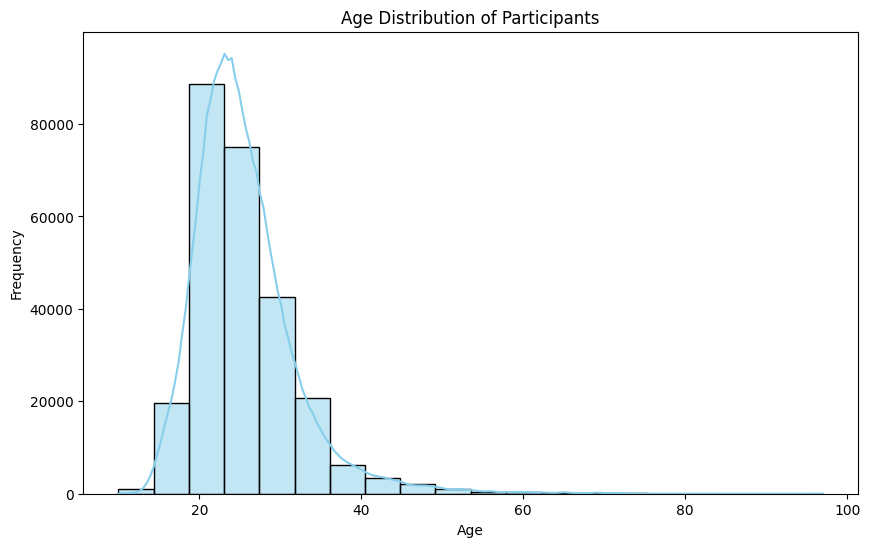

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## - Sex Distribution of participants

C:\Users\madhu\AppData\Local\Temp\ipykernel_22408\853280327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


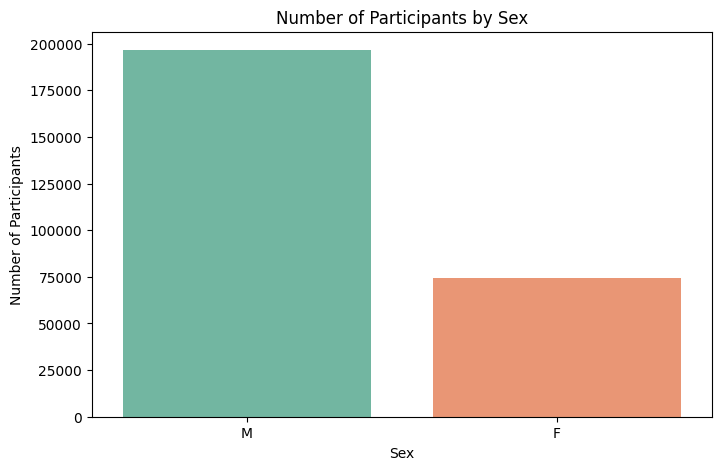

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Number of Participants by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Participants')
plt.show()

## - Sport Distribution of participants

C:\Users\madhu\AppData\Local\Temp\ipykernel_22408\2071251172.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sport', data=df_popular_sports, palette='pastel', order=df_popular_sports['Sport'].value_counts().index)


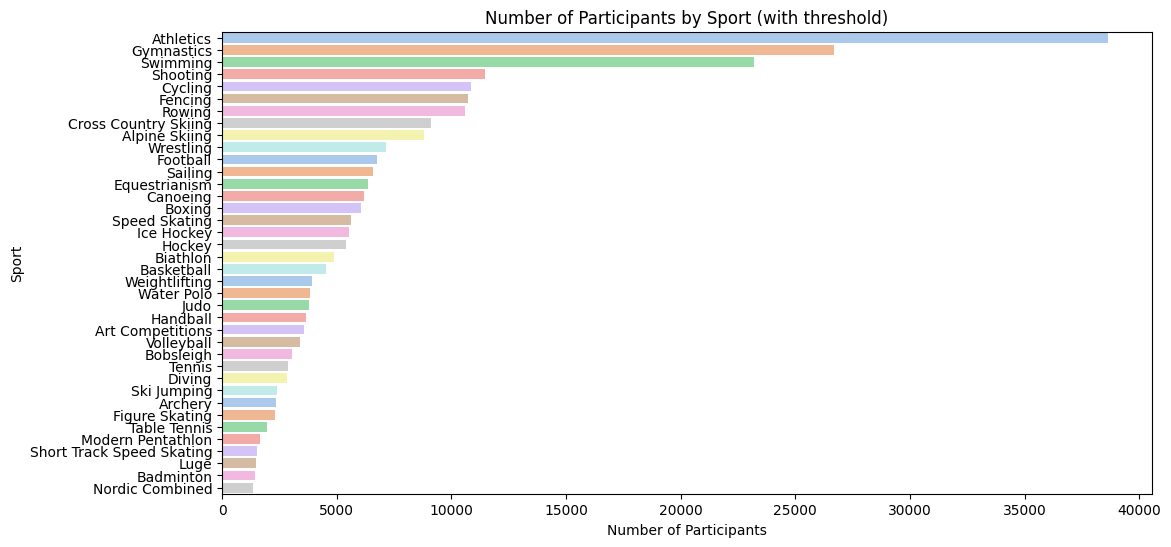

In [41]:
# Set the threshold for minimum number of participants per sport
threshold = 1000

# Filter the DataFrame to include only sports with participants above the threshold
popular_sports = df['Sport'].value_counts()[df['Sport'].value_counts() > threshold].index

# Create a new DataFrame containing only the popular sports
df_popular_sports = df[df['Sport'].isin(popular_sports)]

# Plot the count of participants by sport
plt.figure(figsize=(12, 6))
sns.countplot(y='Sport', data=df_popular_sports, palette='pastel', order=df_popular_sports['Sport'].value_counts().index)
plt.title('Number of Participants by Sport (with threshold)')
plt.xlabel('Number of Participants')
plt.ylabel('Sport')
plt.show()


## - Season distribution of participants

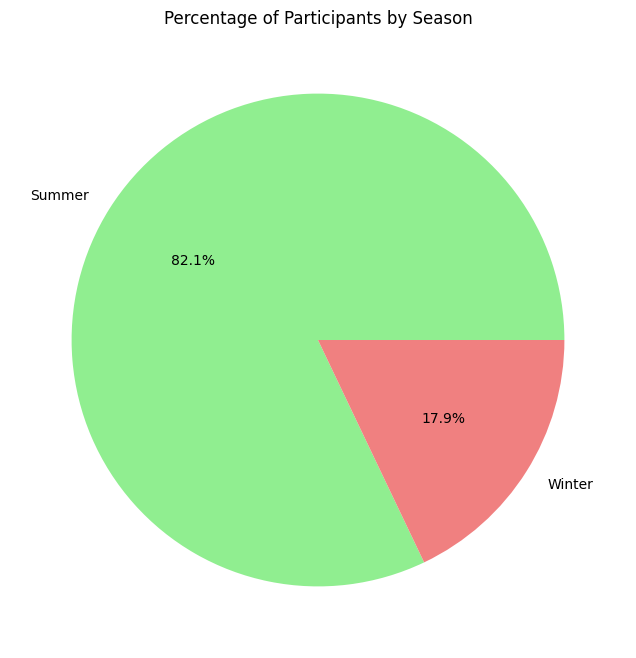

In [42]:
plt.figure(figsize=(8, 8))
df['Season'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Percentage of Participants by Season')
plt.ylabel('')
plt.show()

## - Yearly distribution of participants

C:\Users\madhu\AppData\Local\Temp\ipykernel_22408\3417000438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='Set1')


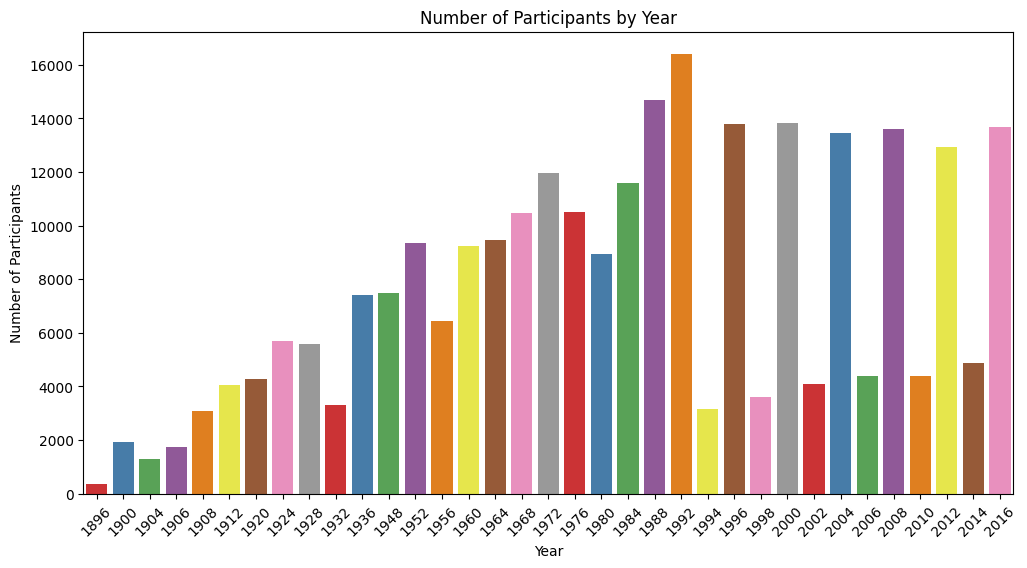

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='Set1')
plt.title('Number of Participants by Year')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()

# 3.2.) Univariate Analysis

- Univariate analysis involves examining a single variable at a time to understand its distribution, central tendency, and variability. 
- It provides insights into the characteristics of individual variables, such as counts, frequencies, and summary statistics, without considering relationships with other variables

## 3.2.1.) Country Comparison

## - Top 10 countries with the highest number of participants

In [44]:
participants_by_country = df.groupby('NOC')['ID'].nunique().sort_values(ascending=False)
print("Top countries by total number of participants:")
print(participants_by_country.head(10))

Top countries by total number of participants:
NOC
USA    9653
GBR    6281
FRA    6170
ITA    4935
GER    4872
CAN    4811
JPN    4067
AUS    3820
SWE    3787
POL    2970
Name: ID, dtype: int64


## ----- The visualization plot

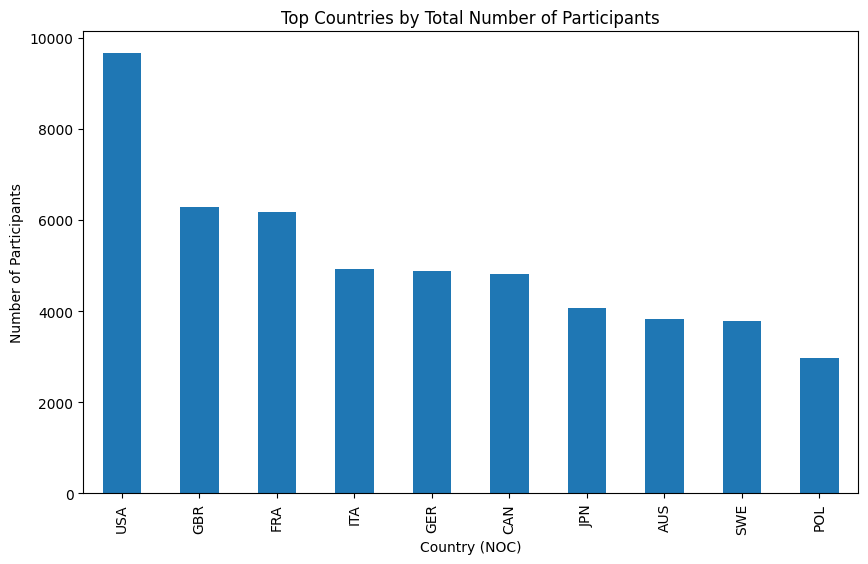

In [45]:
participants_by_country = df.groupby('NOC')['ID'].nunique().sort_values(ascending=False)
participants_by_country.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top Countries by Total Number of Participants')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Participants')
plt.show()

## - Top 10 countries with the highest number of medals won

In [46]:
medals_by_country = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
print("\nTop countries by total number of medals won:")
print(medals_by_country.head(10))


Top countries by total number of medals won:
NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64


## ----- Visualization plot

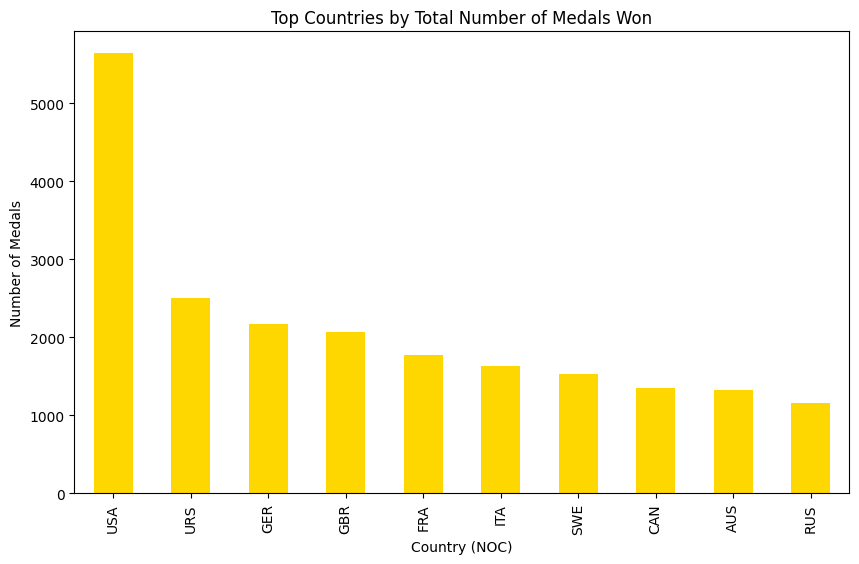

In [47]:
medals_by_country = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
medals_by_country.head(10).plot(kind='bar', figsize=(10, 6), color='gold')
plt.title('Top Countries by Total Number of Medals Won')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Medals')
plt.show()

## - Top 10 countries with the highest average age of participants

In [48]:
average_age_by_country = df.groupby('NOC')['Age'].mean().sort_values(ascending=False)
print("\nTop countries by average age of participants:")
print(average_age_by_country.head(10))


Top countries by average age of participants:
NOC
MON    30.047120
NAM    27.857143
IRL    27.473727
DEN    27.351488
ISV    27.336770
ASA    27.216216
MNE    27.074468
POR    27.039429
BEL    27.031599
AUT    26.959855
Name: Age, dtype: float64


## ----- Visualization plot

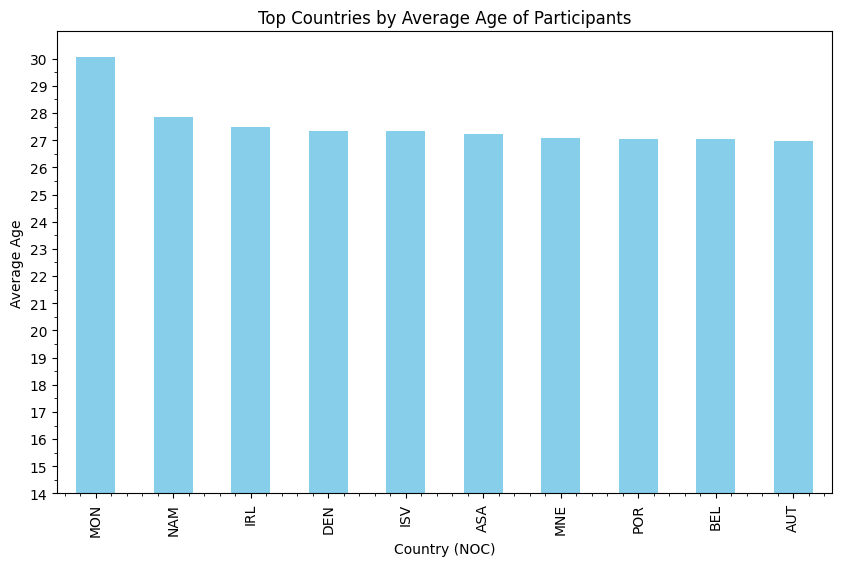

In [63]:
import numpy as np

# Plot the average age by country with modified y-axis scale and minor ticks
plt.figure(figsize=(10, 6))
average_age_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Countries by Average Age of Participants')
plt.xlabel('Country (NOC)')
plt.ylabel('Average Age')

# Set the y-axis limits and ticks
plt.ylim(14, int(average_age_by_country.max()) + 1)
plt.yticks(np.arange(14, int(average_age_by_country.max()) + 1, 1))  # Set the major y-axis ticks
plt.minorticks_on()  # Enable minor ticks
plt.yticks(np.arange(14, int(average_age_by_country.max()) + 0.5, 0.5), minor=True)  # Set the minor y-axis ticks

plt.show()



## - Top 10 countries with the highest average height of participants

In [50]:
average_height_by_country = df.groupby('NOC')['Height'].mean().sort_values(ascending=False)
print("\nTop countries by average height of participants:")
print(average_height_by_country.head(10))


Top countries by average height of participants:
NOC
SCG    187.511401
SRB    184.635204
CRO    183.613174
MNE    183.563830
LTU    182.099502
ISL    181.245413
UAR    181.000000
MLI    180.606557
SEN    180.178886
LAT    179.644501
Name: Height, dtype: float64


## ----- Visualization plot

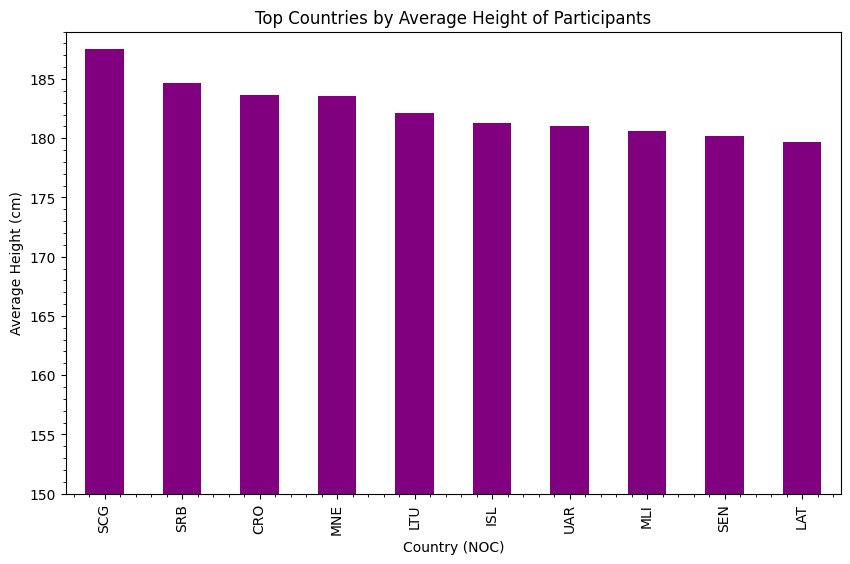

In [66]:
# Importing necessary libraries
import numpy as np

# Calculate the average height by country
average_height_by_country = df.groupby('NOC')['Height'].mean().sort_values(ascending=False)

# Plot the average height by country with middle ticks and modified scale
plt.figure(figsize=(10, 6))
average_height_by_country.head(10).plot(kind='bar', color='purple')
plt.title('Top Countries by Average Height of Participants')
plt.xlabel('Country (NOC)')
plt.ylabel('Average Height (cm)')

# Set the y-axis limits and ticks
plt.ylim(150, int(average_height_by_country.max()) + 2)
plt.yticks(np.arange(150, int(average_height_by_country.max()) + 2, 2), minor=True)
plt.minorticks_on()

plt.show()


## - Top 10 countries with the highest average weight of participants

In [52]:
average_weight_by_country = df.groupby('NOC')['Weight'].mean().sort_values(ascending=False)
print("\nTop countries by average weight of participants:")
print(average_weight_by_country.head(10))



Top countries by average weight of participants:
NOC
NRU    95.846154
ASA    87.958333
MNE    84.829787
SCG    83.091205
TGA    82.755556
SAM    81.644231
CRO    81.626347
SRB    80.122449
ISL    78.389277
KIR    78.363636
Name: Weight, dtype: float64


## ----- Visualization plot

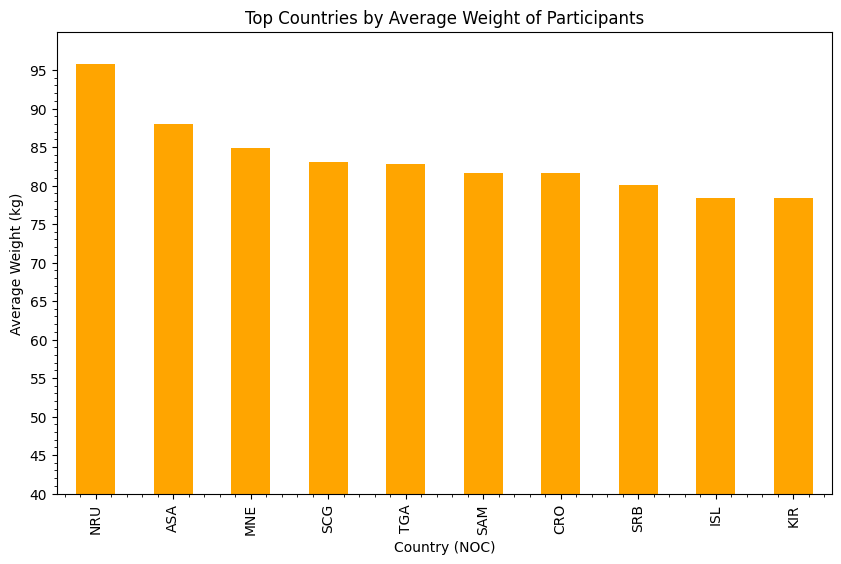

In [64]:
import numpy as np

# Plot the average weight by country with modified y-axis scale and minor ticks
plt.figure(figsize=(10, 6))
average_weight_by_country.head(10).plot(kind='bar', color='orange')
plt.title('Top Countries by Average Weight of Participants')
plt.xlabel('Country (NOC)')
plt.ylabel('Average Weight (kg)')

# Set the y-axis limits and ticks
plt.ylim(40, int(average_weight_by_country.max()) + 5)
plt.yticks(np.arange(40, int(average_weight_by_country.max()) + 1, 5))  # Set the major y-axis ticks
plt.minorticks_on()  # Enable minor ticks
plt.yticks(np.arange(40, int(average_weight_by_country.max()) + 1, 1), minor=True)  # Set the minor y-axis ticks

plt.show()


# Visualization plot for the medal tally by gender

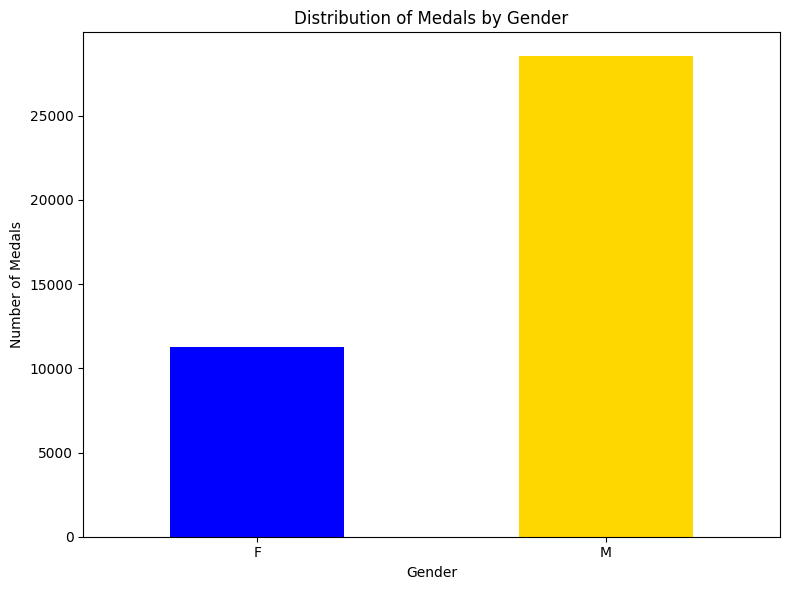

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('athlete_events.csv')

# Filter out rows where gender and medal information is missing
df_gender_medal = df.dropna(subset=['Sex', 'Medal'])

# Group by gender and count the number of medals
gender_medal_counts = df_gender_medal.groupby('Sex')['Medal'].count()

# Plot the distribution of medals by gender
plt.figure(figsize=(8, 6))
gender_medal_counts.plot(kind='bar', color=['blue', 'gold', 'silver'])
plt.title('Distribution of Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3.2.2.) Event Analysis

## - Top 20 Events with the highest number of participants

In [67]:
# Count the number of participants by event
participants_by_event = df.groupby('Event')['ID'].nunique().sort_values(ascending=False)

## -----Visualization plot

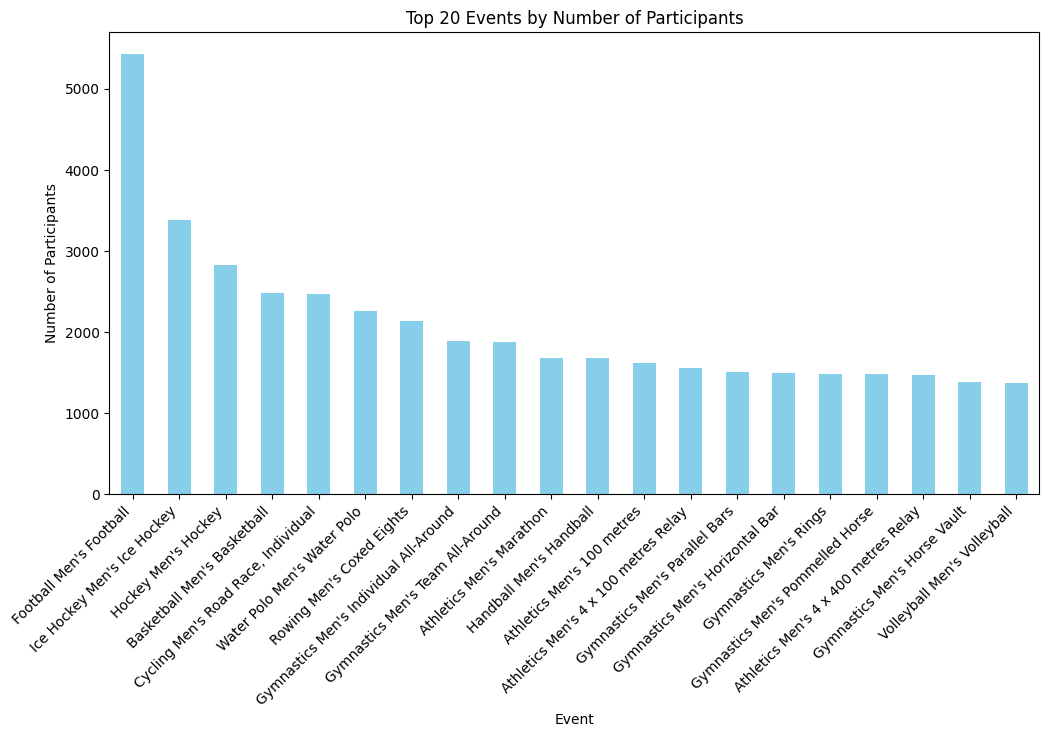

In [68]:
plt.figure(figsize=(12, 6))
participants_by_event.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Events by Number of Participants')
plt.xlabel('Event')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.show()

## - Top 20 Events by the highest number of medals

In [69]:
# Count the number of medals by event
medals_by_event = df[df['Medal'].notnull()].groupby('Event')['Medal'].count().sort_values(ascending=False)

## -----Visualization Plot

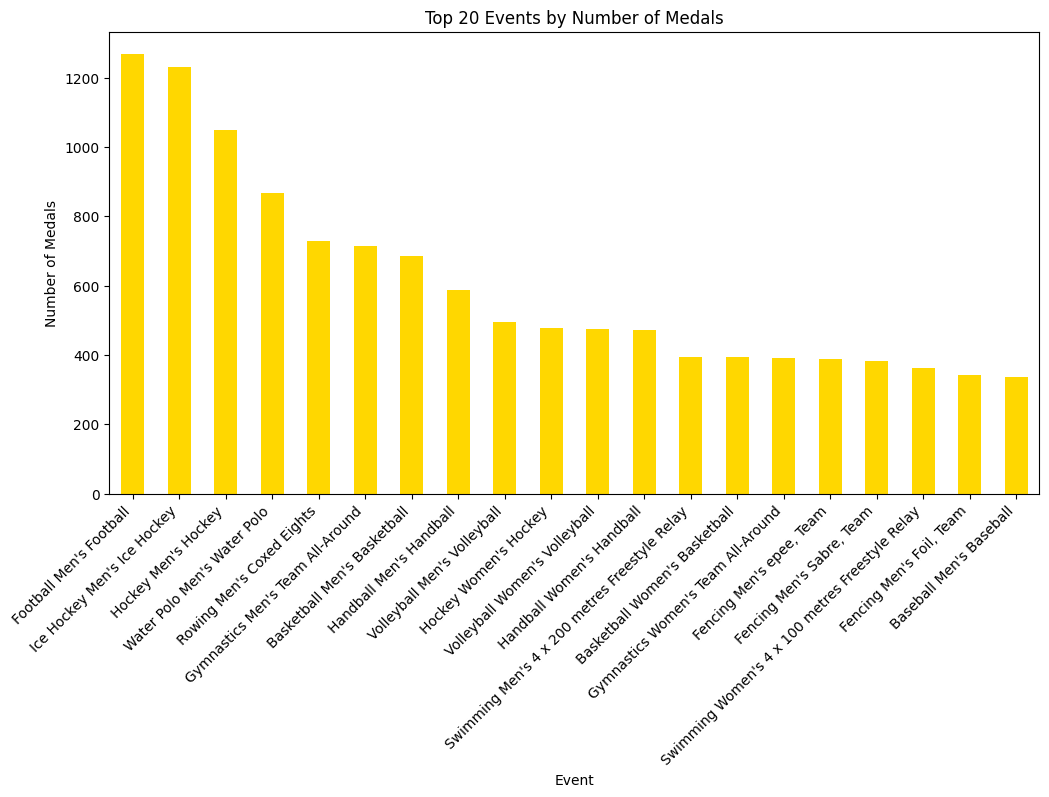

In [70]:
plt.figure(figsize=(12, 6))
medals_by_event.head(20).plot(kind='bar', color='gold')
plt.title('Top 20 Events by Number of Medals')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()

## - Distribution of medals across sports plot

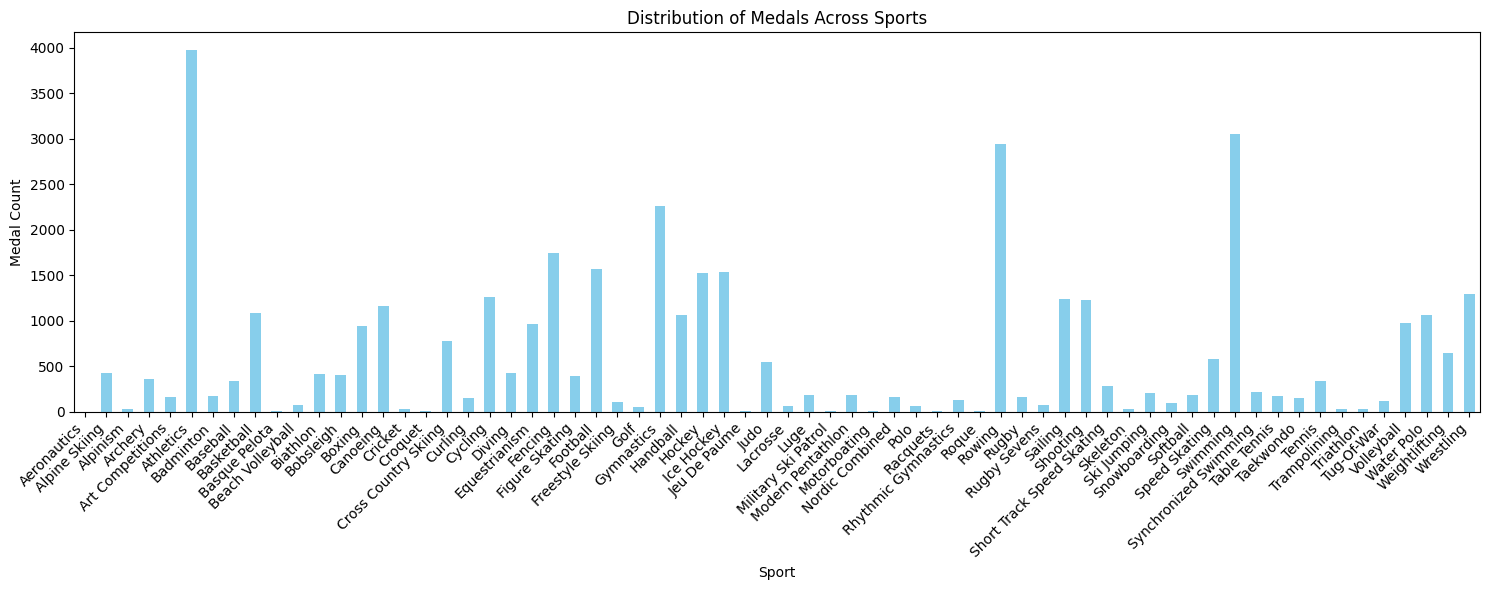

In [108]:
# Distribution of medals across sports
medal_distribution_by_sport = (
   df[df["Medal"] != "NA"].groupby("Sport")["Medal"].count()
)

plt.figure(figsize=(15, 6))  # Increase figure size
ax = medal_distribution_by_sport.plot(kind="bar", color='skyblue')
plt.title("Distribution of Medals Across Sports")
plt.xlabel("Sport")
plt.ylabel("Medal Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# 3.3.) Bivariate Analysis

- Bivariate analysis involves the simultaneous examination of two variables to explore relationships, dependencies, or associations between them. 
- By comparing the distributions or patterns of two variables, bivariate analysis helps uncover correlations, trends, or differences that may exist between the variables

## 3.3.1.) Country comparison based on Gold,Silver,Bronze medals

## - Based on Gold

In [71]:
medal_winners = df.dropna(subset=['Medal'])

medals_by_country = medal_winners.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

medals_by_country['Total'] = medals_by_country.sum(axis=1)
medals_by_country = medals_by_country.sort_values(by='Total', ascending=False)

print("Top countries by the number of gold medals:")
print(medals_by_country['Gold'].head(10))

Top countries by the number of gold medals:
NOC
USA    2638
URS    1082
GER     745
GBR     678
FRA     501
ITA     575
SWE     479
CAN     463
AUS     348
RUS     390
Name: Gold, dtype: int64


## - Based on Silver

In [72]:
print("\nTop countries by the number of silver medals:")
print(medals_by_country['Silver'].head(10))


Top countries by the number of silver medals:
NOC
USA    1641
URS     732
GER     674
GBR     739
FRA     610
ITA     531
SWE     522
CAN     438
AUS     455
RUS     367
Name: Silver, dtype: int64


## -Based on Bronze

In [73]:
print("\nTop countries by the number of bronze medals:")
print(medals_by_country['Bronze'].head(10))


Top countries by the number of bronze medals:
NOC
USA    1358
URS     689
GER     746
GBR     651
FRA     666
ITA     531
SWE     535
CAN     451
AUS     517
RUS     408
Name: Bronze, dtype: int64


## Plot to visualize the top 10 countries by the number of medals

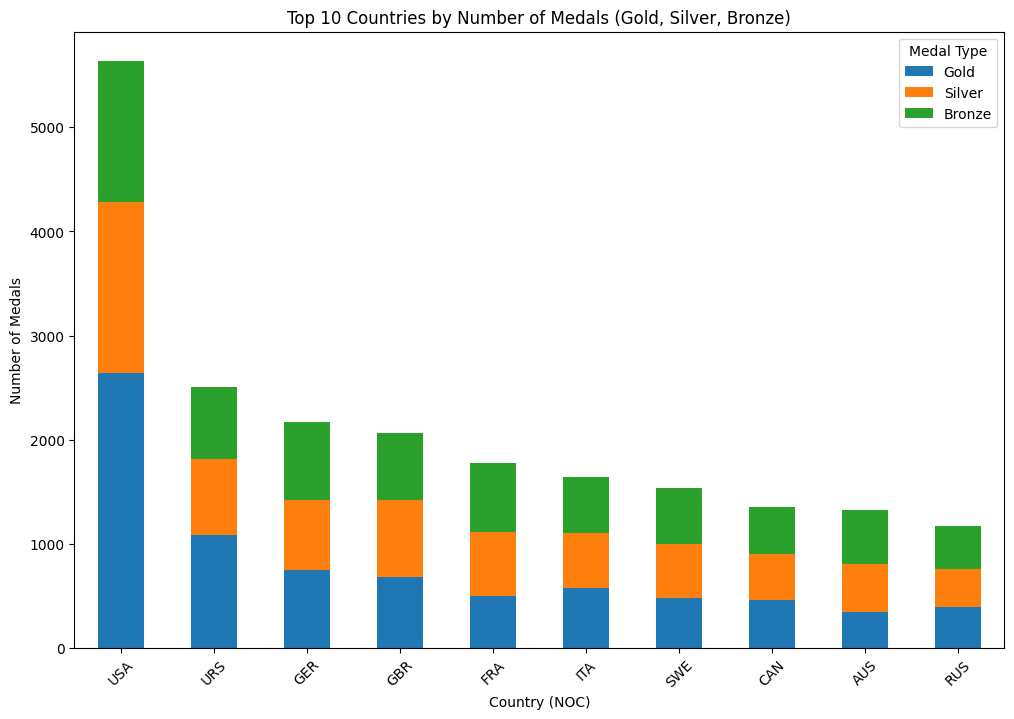

In [74]:
top_countries = medals_by_country.head(10)
top_countries[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 10 Countries by Number of Medals (Gold, Silver, Bronze)')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')
plt.show()

# 3.3.2.) Correlation Analysis

- Correlation analysis evaluates the strength and direction of relationships between pairs of variables in a dataset, typically using correlation coefficients such as Pearson, Spearman, or Kendall tau
- Interpretation of correlation results involves assessing the magnitude (close to +1 or -1 indicating strong correlation, 0 indicating no correlation) and direction (positive or negative) of the relationship between variables.

## Correlation analysis based on "Age", "Height" and "Weight"

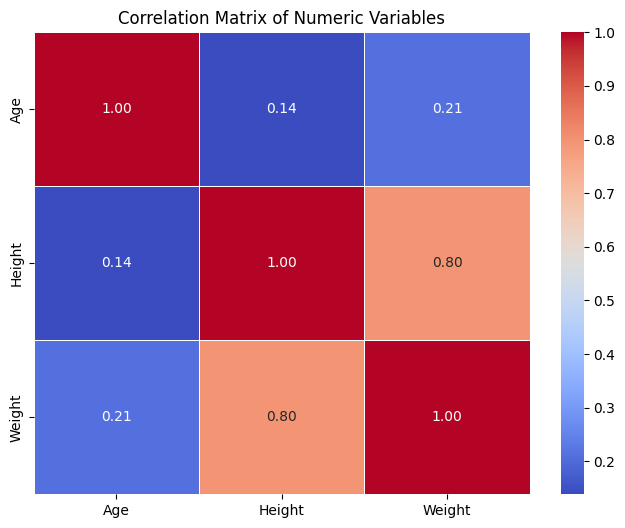

In [75]:
numeric_df = df[['Age', 'Height', 'Weight']]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# 3.4.) Demographic Analysis

- Demographic analysis: Examining age, sex, height,weight distributions to understand the population composition and characteristics in the Olympic dataset.

## - Age distribution of participants w.r.t their frequency

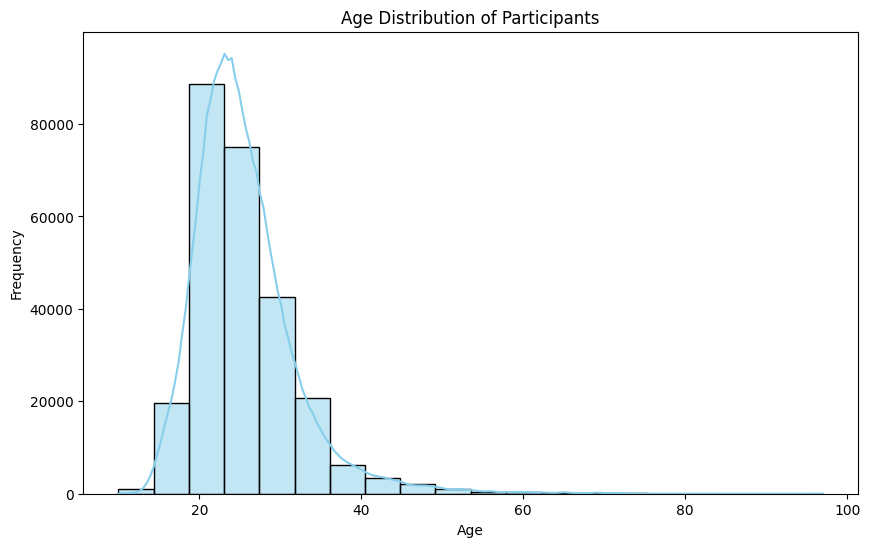

In [76]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## - Sex distribution of participants w.r.t their frequency

C:\Users\madhu\AppData\Local\Temp\ipykernel_22408\2443870129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


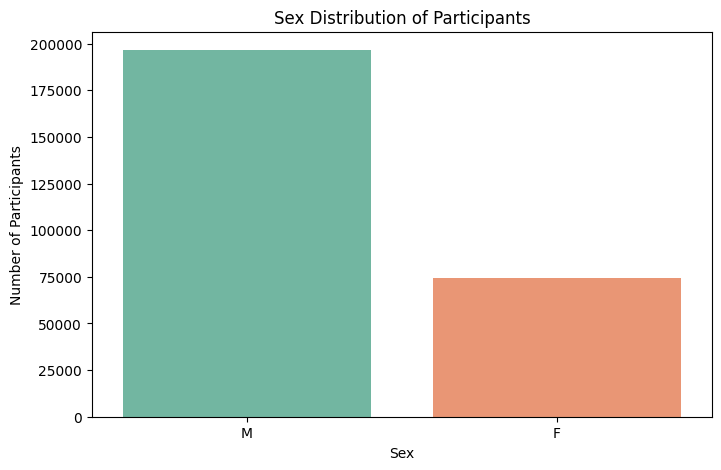

In [77]:
# Sex distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Sex Distribution of Participants')
plt.xlabel('Sex')
plt.ylabel('Number of Participants')
plt.show()

## - Height distribution of participants w.r.t their frequency

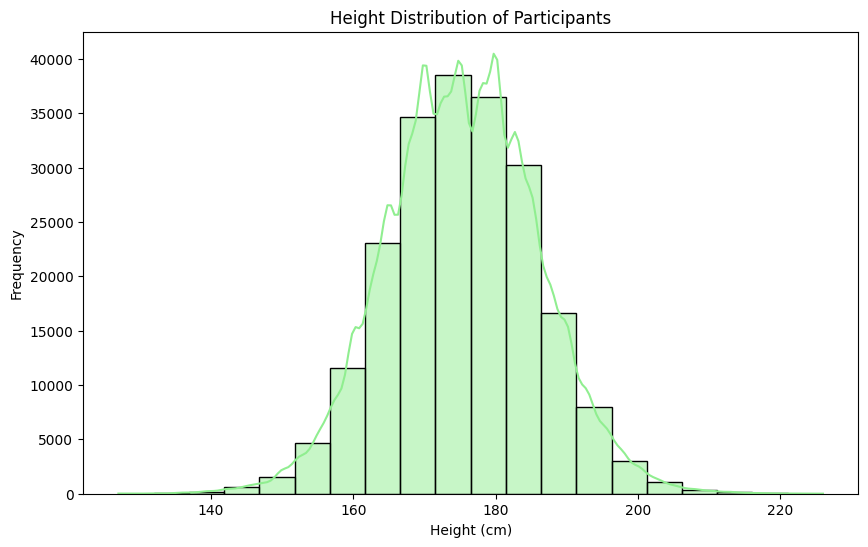

In [79]:
# Height distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=20, kde=True, color='lightgreen')
plt.title('Height Distribution of Participants')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

## - Weight distribution of participants w.r.t their frequency

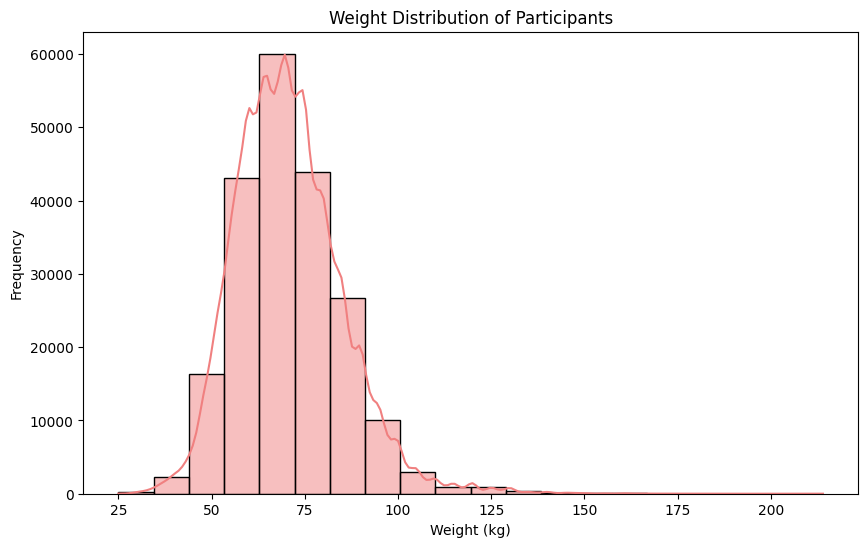

In [78]:
# Weight distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], bins=20, kde=True, color='lightcoral')
plt.title('Weight Distribution of Participants')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# 3.5.) Temporal Trend Analysis
- Temporal Trend Analysis involves examining how variables change over time to identify patterns, trends, or anomalies in the data, providing insights into temporal dynamics and evolution. 
- It helps uncover underlying patterns or relationships that may exist within the dataset over different time periods.

## - Trends in medal counts over time

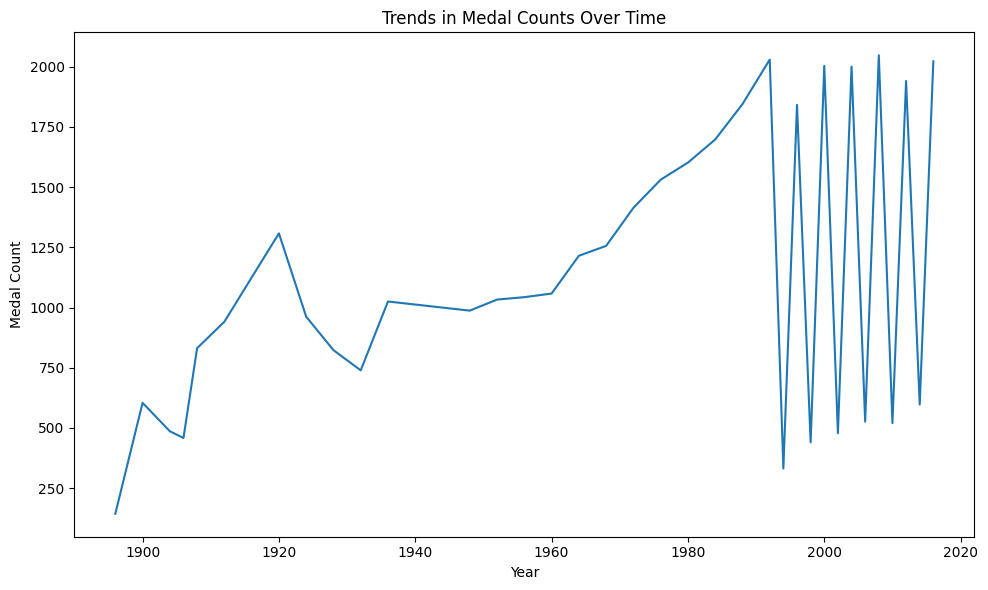

In [82]:
medal_counts_by_year = df.groupby("Year")["Medal"].count()
medal_counts_by_year.plot(kind="line", figsize=(10, 6))
plt.title("Trends in Medal Counts Over Time")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.tight_layout()
plt.show()


## - Trends in the Number Of Participants Over Time

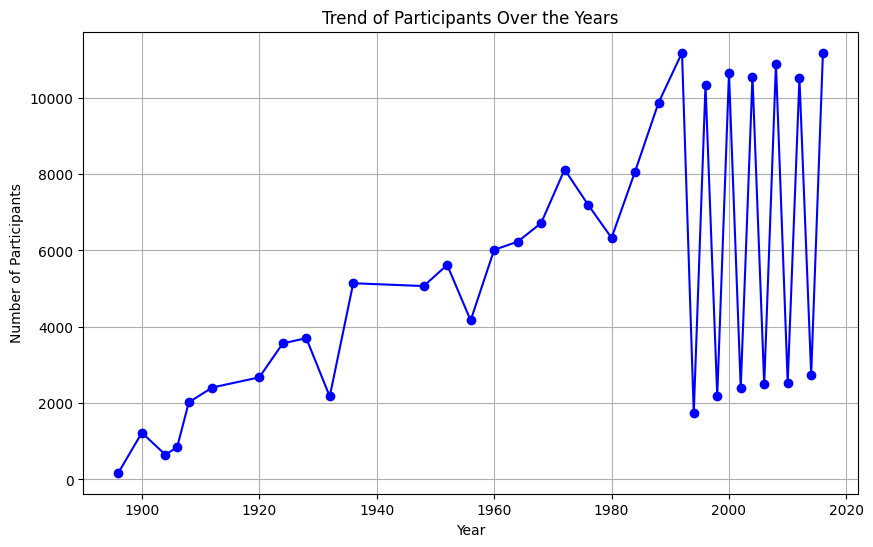

In [93]:
import matplotlib.pyplot as plt

# Group the data by year and count the number of participants each year
participants_by_year = df.groupby('Year')['ID'].nunique()

# Plot the trend of participants over the years
plt.figure(figsize=(10, 6))
plt.plot(participants_by_year.index, participants_by_year.values, marker='o', color='b')
plt.title('Trend of Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.show()


## - Trends in the Average Height Over Time

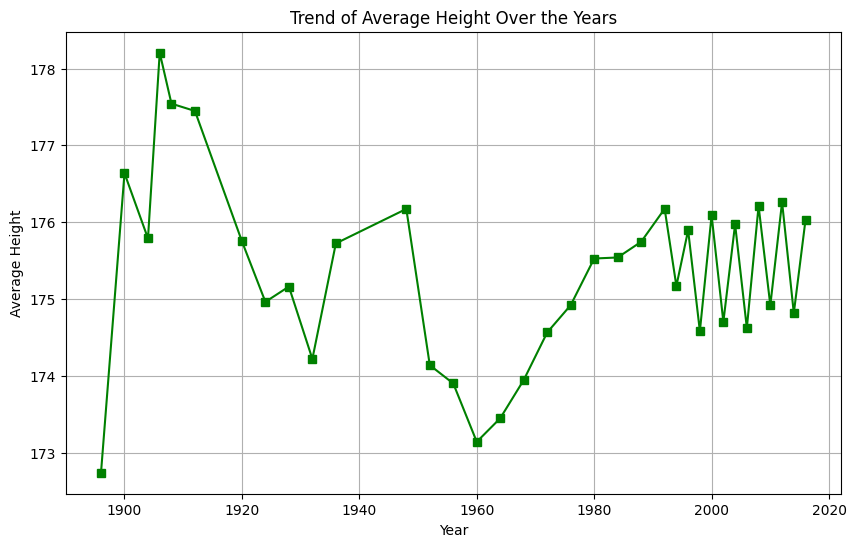

In [97]:
# Plot the trend of average height over the years
plt.figure(figsize=(10, 6))
plt.plot(average_height_by_year.index, average_height_by_year.values, marker='s', color='g')
plt.title('Trend of Average Height Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Height')
plt.grid(True)
plt.show()


## - Trends in Average Age Over Time

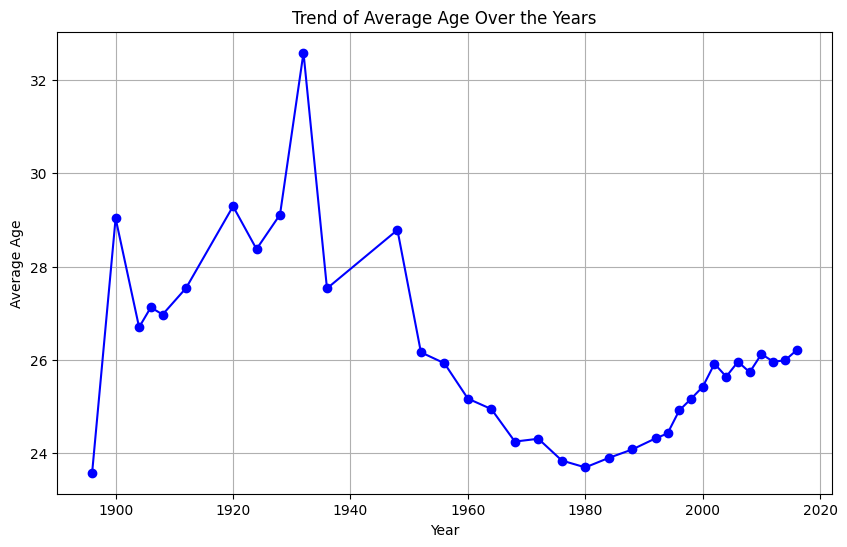

In [96]:
# Plot the trend of average age over the years
plt.figure(figsize=(10, 6))
plt.plot(average_age_by_year.index, average_age_by_year.values, marker='o', color='b')
plt.title('Trend of Average Age Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

## - Trends in Average Weight Over time

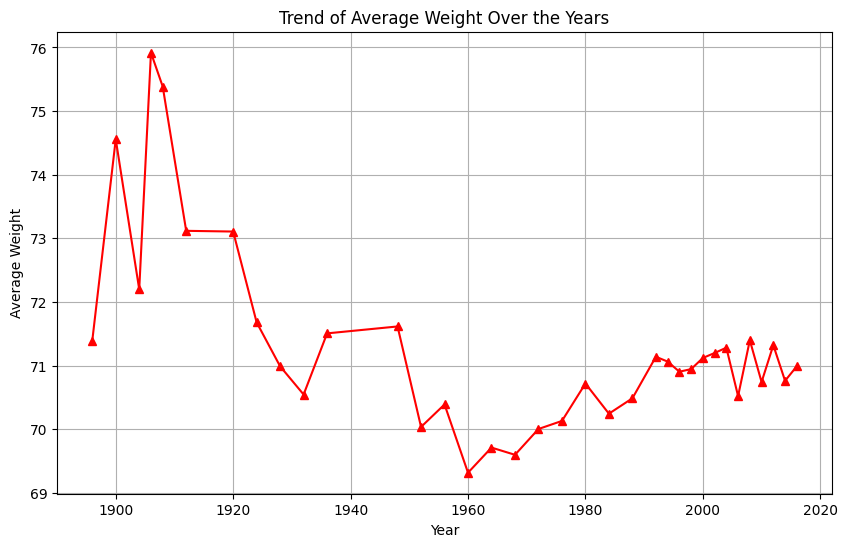

In [98]:
# Plot the trend of average weight over the years
plt.figure(figsize=(10, 6))
plt.plot(average_weight_by_year.index, average_weight_by_year.values, marker='^', color='r')
plt.title('Trend of Average Weight Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Weight')
plt.grid(True)
plt.show()

# 3.6.) Geospatial Analysis

- Geospatial analysis involves examining and interpreting data with geographic components, often using maps and spatial statistics to understand patterns, trends, and relationships across locations. 
- It integrates geographic information systems (GIS), statistical analysis, and visualization techniques to derive insights from spatial data.

## - Distribution of participants by region in a geographical distribution

C:\Users\madhu\AppData\Local\Temp\ipykernel_22408\3579336818.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


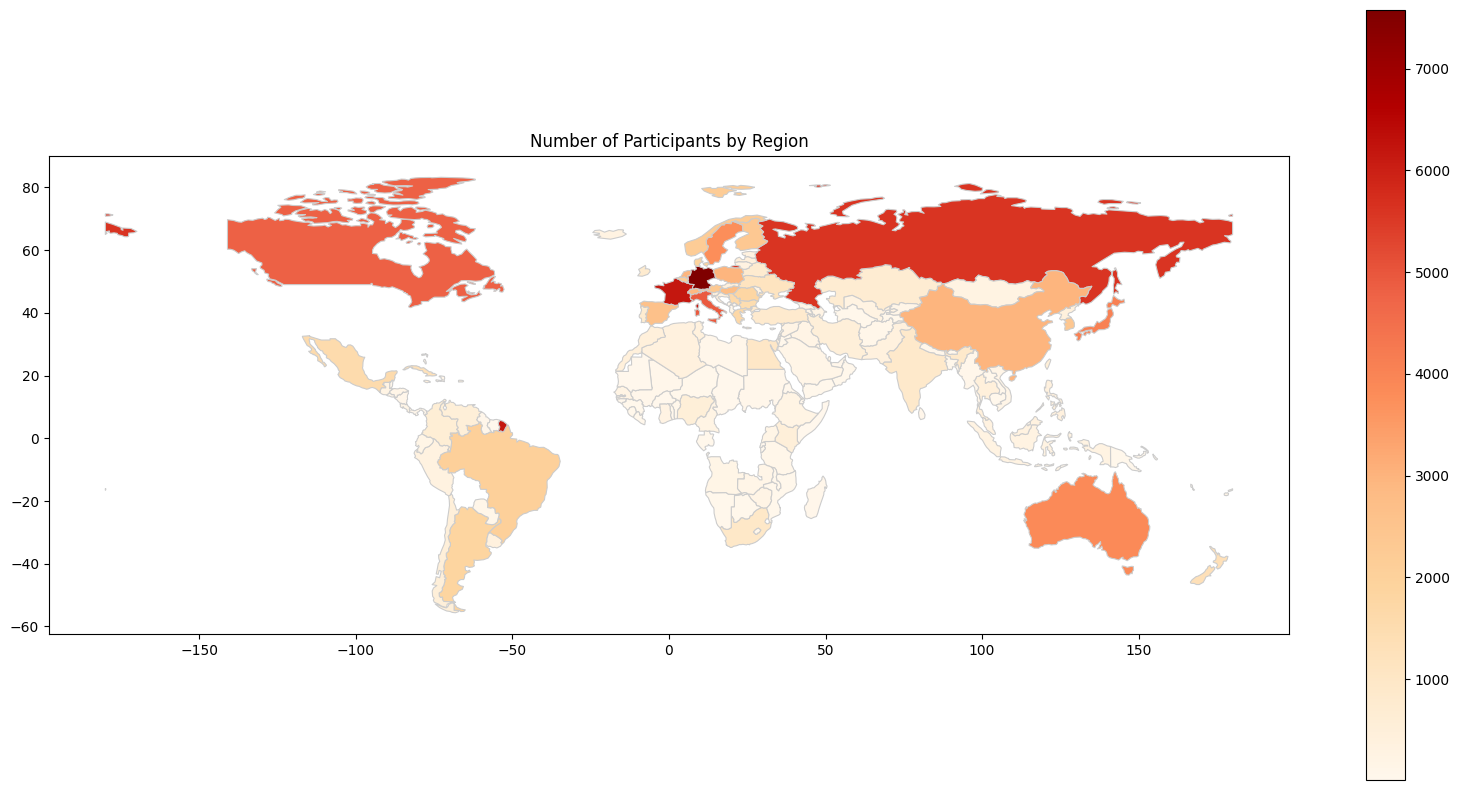

In [123]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace NaN values in the 'region' column with 'Unknown'
df['region'].fillna('Unknown', inplace=True)

# Group by region and count the number of participants
participants_by_region = df.groupby('region')['ID'].nunique().reset_index()

# Load world shapefile for mapping
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge participant count with world map
world = world.merge(participants_by_region, how='left', left_on='name', right_on='region')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world.plot(column='ID', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Participants by Region')
plt.show()



# 4.) Predictive Analysis

- Predictive analysis leverages historical data to build models that predict future events or behaviors. 
- By identifying patterns and relationships within the data, predictive analysis enables organizations to anticipate outcomes, mitigate risks, and capitalize on opportunities. 
- It involves the application of statistical algorithms, machine learning techniques, and data mining to extract valuable insights from large datasets, ultimately driving more informed and strategic decision-making.

In [128]:
#MEDAL PREDICTION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


# Select features and target variable
X = df[['Age', 'Height', 'Weight']]
y = df['Medal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8536810268515787

Classification Report:


c:\Users\madhu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madhu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           -       0.85      1.00      0.92     46290
      Bronze       0.00      0.00      0.00      2692
        Gold       0.00      0.00      0.00      2639
      Silver       0.00      0.00      0.00      2603

    accuracy                           0.85     54224
   macro avg       0.21      0.25      0.23     54224
weighted avg       0.73      0.85      0.79     54224



c:\Users\madhu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5.) Conclusion

*Throughout our analysis, we delved into various aspects of the Olympic dataset.* 
- *Beginning with exploratory data analysis (EDA), we investigated demographic characteristics, event participation, and medal predictions.*
- *We visualized trends over time, spatial distributions, and correlations among variables. Additionally, we conducted predictive modeling to forecast medal outcomes, employing logistic regression and support vector machines (SVM).*
- *While logistic regression yielded an accuracy of approximately 84-85%, exploring alternative models like SVM could potentially enhance prediction accuracy.*
- *Overall, our analysis provided insights into the Olympic dataset's dynamics, offering avenues for further exploration and refinement in predictive modeling.*

*Feel free to explore the analysis conducted and share your insights or exchange views on the findings. Your input and perspectives are valuable for deeper understanding and refining the conclusions drawn from the data.*